In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Step 2: Load the features and target
X = pd.read_csv('X_with_cluster_distances.csv')
Y = pd.read_csv('Y.csv')

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# Targets
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Confirm the shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_small, _, y_train_small, _ = train_test_split(
    X_train_scaled, y_train, train_size=0.3, stratify=y_train, random_state=42
)

# Results storage
final_results = []

Training features shape: (8171, 13)
Testing features shape: (2043, 13)
Training labels shape: (8171, 1)
Testing labels shape: (2043, 1)



=== Linear SVM (No Transform) ===


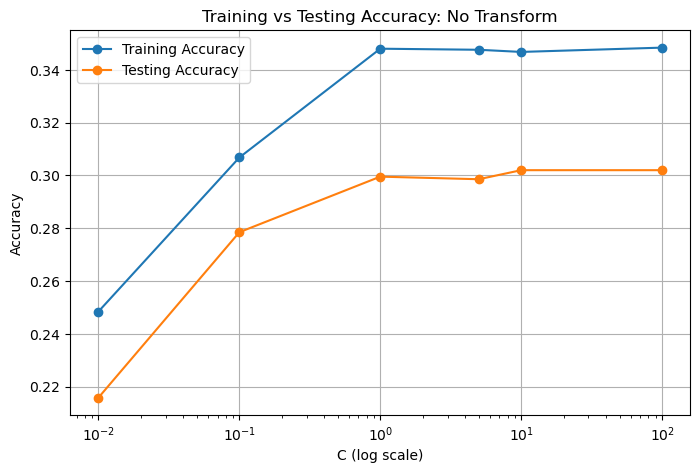


Precision and Recall Table (No Transform):


,C,Precision,Recall
0,0.01,0.142068,0.215859
1,0.10,0.238729,0.278512
2,1.00,0.276169,0.299559
3,5.00,0.276149,0.298581
4,10.00,0.279186,0.302007
5,100.00,0.278818,0.302007


In [2]:
# No Transform (Linear SVM)
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []

C_values = [0.01, 0.1, 1, 5, 10, 100]

print("\n=== Linear SVM (No Transform) ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'No Transform',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot Training vs Testing Accuracy
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: No Transform')
plt.legend()
plt.grid(True)
plt.show()

# Output Precision and Recall Table
prec_recall_table = pd.DataFrame({
    'C': C_values,
    'Precision': precision_list,
    'Recall': recall_list
})
print("\nPrecision and Recall Table (No Transform):")
display(prec_recall_table)


=== Polynomial Features Degree 2 ===


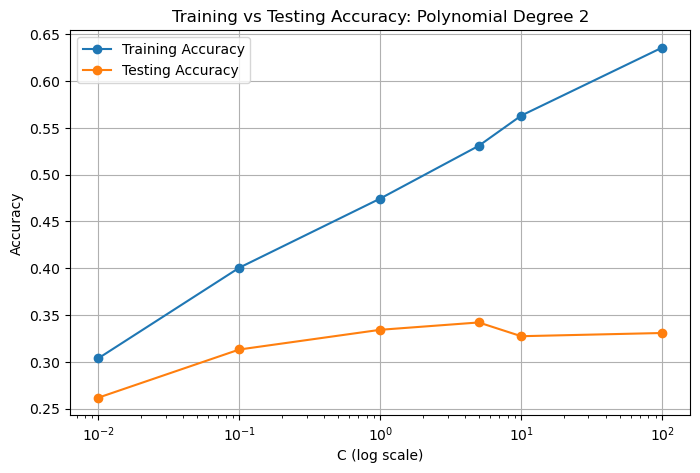


Precision and Recall Table (Polynomial Degree 2):


,C,Precision,Recall
0,0.01,0.223767,0.261870
1,0.10,0.289440,0.313265
2,1.00,0.314398,0.334312
3,5.00,0.326523,0.342144
4,10.00,0.314249,0.327460
5,100.00,0.318979,0.330886


In [3]:
# Polynomial Features (Degree 2)
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_small)
X_test_poly2 = poly2.transform(X_test_scaled)

train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []

print("\n=== Polynomial Features Degree 2 ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_poly2, y_train_small)

    y_train_pred = model.predict(X_train_poly2)
    y_test_pred = model.predict(X_test_poly2)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Poly Degree 2',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Polynomial Degree 2')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Polynomial Degree 2):")
display(prec_recall_table)


=== Polynomial Features Degree 3 ===


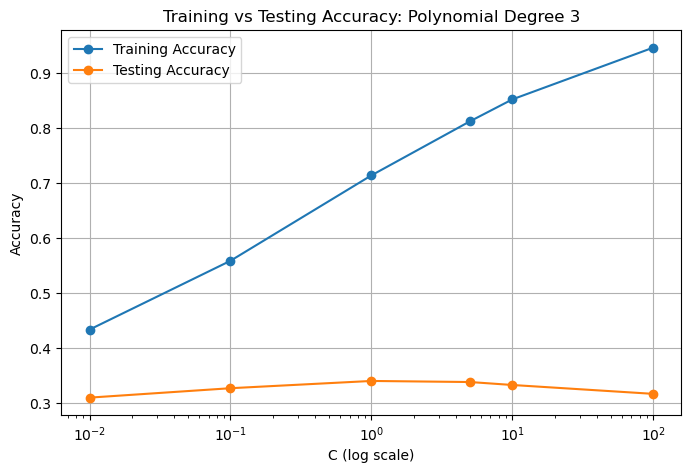


Precision and Recall Table (Polynomial Degree 3):


,C,Precision,Recall
0,0.01,0.291813,0.309838
1,0.10,0.311856,0.326970
2,1.00,0.335104,0.340186
3,5.00,0.335050,0.338228
4,10.00,0.329201,0.332844
5,100.00,0.317075,0.316691


In [4]:
# Polynomial Features (Degree 3)
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train_small)
X_test_poly3 = poly3.transform(X_test_scaled)

train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []

print("\n=== Polynomial Features Degree 3 ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_poly3, y_train_small)

    y_train_pred = model.predict(X_train_poly3)
    y_test_pred = model.predict(X_test_poly3)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Poly Degree 3',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Polynomial Degree 3')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Polynomial Degree 3):")
display(prec_recall_table)


=== Polynomial Features Degree 4 ===


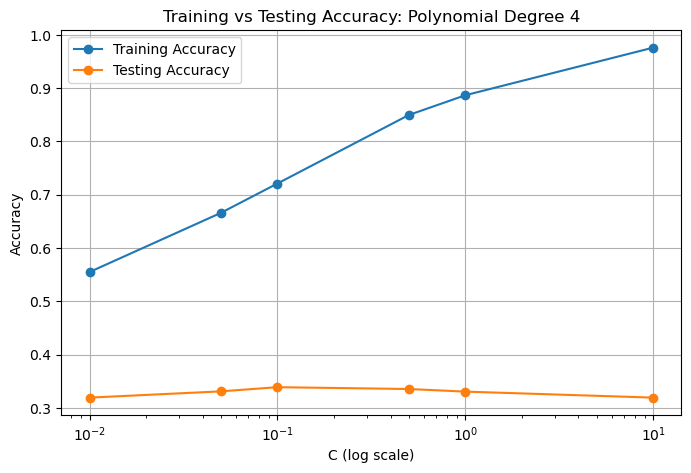


Precision and Recall Table (Polynomial Degree 4):


,C,Precision,Recall
0,0.01,0.299596,0.319139
1,0.05,0.321357,0.330886
2,0.10,0.329298,0.338718
3,0.50,0.332608,0.335291
4,1.00,0.329007,0.330396
5,10.00,0.316016,0.319139


In [5]:
# Polynomial Features (Degree 4)
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train_small)
X_test_poly4 = poly4.transform(X_test_scaled)
C_values = [0.01, 0.05, 0.1, 0.5, 1, 10]
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []

print("\n=== Polynomial Features Degree 4 ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_poly4, y_train_small)

    y_train_pred = model.predict(X_train_poly4)
    y_test_pred = model.predict(X_test_poly4)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Poly Degree 4',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Polynomial Degree 4')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Polynomial Degree 4):")
display(prec_recall_table)


=== Log Transform ===


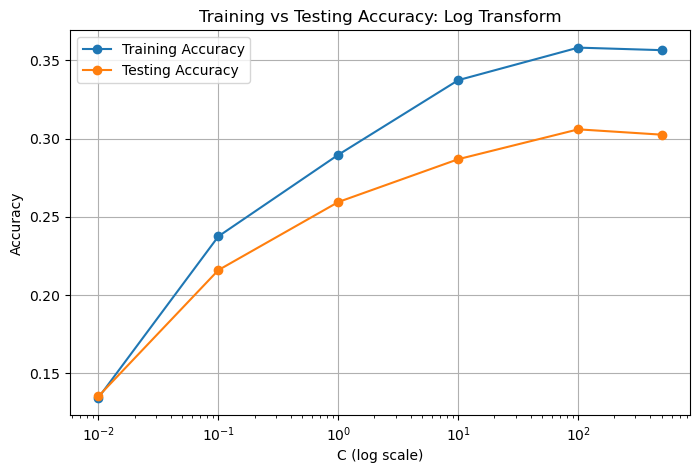


Precision and Recall Table (Log Transform):


,C,Precision,Recall
0,0.01,0.078718,0.135095
1,0.10,0.147386,0.215859
2,1.00,0.194269,0.259422
3,10.00,0.233867,0.286833
4,100.00,0.279079,0.305923
5,500.00,0.280521,0.302496


In [6]:
# Log Transform
X_train_log = np.log(X_train_small + 1e-5 - np.min(X_train_small))
X_test_log = np.log(X_test_scaled + 1e-5 - np.min(X_train_small))

train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 10, 100, 500]
print("\n=== Log Transform ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_log, y_train_small)

    y_train_pred = model.predict(X_train_log)
    y_test_pred = model.predict(X_test_log)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Log Transform',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Log Transform')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Log Transform):")
display(prec_recall_table)


=== RBF Kernel ===


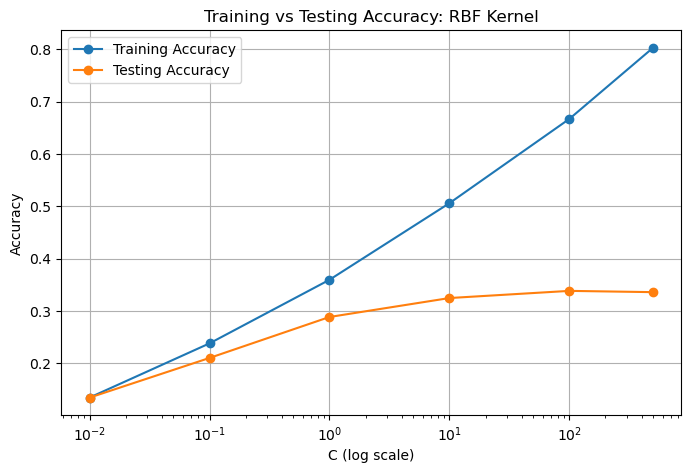


Precision and Recall Table (RBF Kernel):


,C,Precision,Recall
0,0.01,0.017987,0.134116
1,0.10,0.126495,0.209985
2,1.00,0.257512,0.288302
3,10.00,0.298270,0.324523
4,100.00,0.322877,0.338228
5,500.00,0.325520,0.335781


In [7]:
# RBF Kernel
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 10, 100, 500]
print("\n=== RBF Kernel ===")

for C in C_values:
    model = SVC(C=C, kernel='rbf', gamma='scale', random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'RBF Kernel',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (RBF Kernel):")
display(prec_recall_table)

In [ ]:
# Final Results Table
final_results_df = pd.DataFrame(final_results)
from IPython.display import display
display(final_results_df)
final_results_df.to_csv('svm_final_metrics_results.csv', index=False)

,Transformation,C,Train Accuracy,Test Accuracy,Precision,Recall
0,No Transform,0.01,0.248470,0.215859,0.142068,0.215859
1,No Transform,0.10,0.306814,0.278512,0.238729,0.278512
2,No Transform,1.00,0.348021,0.299559,0.276169,0.299559
3,No Transform,5.00,0.347613,0.298581,0.276149,0.298581
4,No Transform,10.00,0.346797,0.302007,0.279186,0.302007
5,No Transform,100.00,0.348429,0.302007,0.278818,0.302007
6,Poly Degree 2,0.01,0.303958,0.261870,0.223767,0.261870
7,Poly Degree 2,0.10,0.400653,0.313265,0.289440,0.313265
8,Poly Degree 2,1.00,0.474500,0.334312,0.314398,0.334312
9,Poly Degree 2,5.00,0.530804,0.342144,0.326523,0.342144


Saved Ridge Regression metrics to 'ridge_final_metrics_results.csv'
